In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("Modeling_4-23.csv")

## NOT binning Degree

In [6]:
ohe = OneHotEncoder()
df = pd.get_dummies(df, columns=['Degree'], dtype=int)

In [8]:
X = df.loc[:, df.columns!='Depression']
y = df['Depression']

In [10]:
X_train_XGB , X_test_XGB , y_train_XGB , y_test_XGB = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
XGB = XGBClassifier()

In [14]:
XGB.fit(X_train_XGB, y_train_XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
y_prediction_xgboost = XGB.predict(X_test_XGB)

## Results

In [19]:
print(classification_report(y_test_XGB, y_prediction_xgboost))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2316
           1       0.85      0.89      0.87      3253

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.83      5569
weighted avg       0.84      0.84      0.84      5569



## Binning Degree

In [22]:
df_ = pd.read_csv("Modeling_4-23.csv")

In [24]:
High_School = ["'Class 12'"]
Bachelor = ['B.Pharm','BSc','BA','BCA','B.Ed','LLB','BE','BHM','B.Com','B.Arch','B.Tech','BBA']
Graduate = ['M.Tech','M.Ed','MSc','M.Pharm','MCA','MA','MBA','MBBS','M.Com','ME','MHM','LLM']
Professional = ['PhD','MD']

In [26]:
def categorize_degree(deg):
    if deg in High_School:
        return 'High School'
    elif deg in Bachelor:
        return 'Bachelor'
    elif deg in Graduate:
        return 'Graduate'
    elif deg in Professional:
        return 'Professional'


df_['Education'] = df_['Degree'].apply(categorize_degree)

In [28]:
df_ = df_.drop(columns="Degree")

In [30]:
df_.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Sleep Duration_encoded,Dietary Habits_encoded,Depression,Have you ever had suicidal thoughts ?_No,...,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal,Education
0,33,5,8.97,2,3,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,Bachelor
1,24,2,5.90,5,3,2,1,1,0,1,...,1,0,0,0,0,0,0,0,0,Bachelor
2,31,3,7.03,5,9,1,0,2,0,1,...,0,0,0,0,0,0,0,0,0,Bachelor
3,28,3,5.59,2,4,5,3,1,1,0,...,0,0,0,0,0,0,0,1,0,Bachelor
4,25,4,8.13,3,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,Graduate


In [32]:
ohe_ = OneHotEncoder()
df_ = pd.get_dummies(df_, columns=['Education'], dtype=int)

In [34]:
X_ = df_.loc[:, df_.columns!='Depression']
y_ = df_['Depression']

In [36]:
X_train_XGB_ , X_test_XGB_ , y_train_XGB_ , y_test_XGB_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [38]:
XGB_ = XGBClassifier()

In [40]:
XGB_.fit(X_train_XGB_, y_train_XGB_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_prediction_xgboost_ = XGB_.predict(X_test_XGB_)

## Results

In [45]:
print(classification_report(y_test_XGB_, y_prediction_xgboost_))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2316
           1       0.85      0.89      0.87      3253

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.83      5569
weighted avg       0.84      0.84      0.84      5569



# AGE

## Binning

In [5]:
df_Age = pd.read_csv("Modeling_4-23.csv")

In [7]:
bins = [18, 26, 36, 46, 56, 60]  # Note the upper bound is exclusive, so we use 60 for 59 inclusive
labels = ['18-25', '26-35', '36-45', '46-55', '56-59']

df_Age['Age_binned_custom'] = pd.cut(df_Age['Age'], bins=bins, labels=labels, right=False)
print(df_Age[['Age', 'Age_binned_custom']].head())

   Age Age_binned_custom
0   33             26-35
1   24             18-25
2   31             26-35
3   28             26-35
4   25             18-25


In [9]:
df_Age.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Degree,Work/Study Hours,Financial Stress,Sleep Duration_encoded,Dietary Habits_encoded,Depression,...,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal,Age_binned_custom
0,33,5,8.97,2,B.Pharm,3,1,1,2,1,...,0,0,0,0,0,0,0,0,0,26-35
1,24,2,5.90,5,BSc,3,2,1,1,0,...,1,0,0,0,0,0,0,0,0,18-25
2,31,3,7.03,5,BA,9,1,0,2,0,...,0,0,0,0,0,0,0,0,0,26-35
3,28,3,5.59,2,BCA,4,5,3,1,1,...,0,0,0,0,0,0,0,1,0,26-35
4,25,4,8.13,3,M.Tech,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,18-25


In [11]:
df_Age.drop(columns="Age")

,Academic Pressure,CGPA,Study Satisfaction,Degree,Work/Study Hours,Financial Stress,Sleep Duration_encoded,Dietary Habits_encoded,Depression,Have you ever had suicidal thoughts ?_No,...,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal,Age_binned_custom
0,5,8.97,2,B.Pharm,3,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,26-35
1,2,5.90,5,BSc,3,2,1,1,0,1,...,1,0,0,0,0,0,0,0,0,18-25
2,3,7.03,5,BA,9,1,0,2,0,1,...,0,0,0,0,0,0,0,0,0,26-35
3,3,5.59,2,BCA,4,5,3,1,1,0,...,0,0,0,0,0,0,0,1,0,26-35
4,4,8.13,3,M.Tech,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27840,5,5.75,5,'Class 12',7,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,26-35
27841,2,9.40,3,MSc,0,3,0,2,0,1,...,0,0,0,1,0,0,0,0,0,26-35
27842,3,6.61,4,MD,12,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,26-35
27843,5,6.88,2,'Class 12',10,5,0,2,1,0,...,0,0,0,1,0,0,0,0,0,18-25


In [13]:
df_Age['Age_binned_custom'] = df_Age['Age_binned_custom'].astype(str)

In [15]:
df_Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27845 non-null  int64  
 1   Academic Pressure                          27845 non-null  int64  
 2   CGPA                                       27845 non-null  float64
 3   Study Satisfaction                         27845 non-null  int64  
 4   Degree                                     27845 non-null  object 
 5   Work/Study Hours                           27845 non-null  int64  
 6   Financial Stress                           27845 non-null  int64  
 7   Sleep Duration_encoded                     27845 non-null  int64  
 8   Dietary Habits_encoded                     27845 non-null  int64  
 9   Depression                                 27845 non-null  int64  
 10  Have you ever had suic

In [17]:
ohe_Age = OneHotEncoder()
df_Age = pd.get_dummies(df_Age, columns=['Age_binned_custom'], dtype=int)

In [19]:
df_Age = pd.get_dummies(df_Age, columns=['Degree'], dtype=int)

In [21]:
df_Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27845 non-null  int64  
 1   Academic Pressure                          27845 non-null  int64  
 2   CGPA                                       27845 non-null  float64
 3   Study Satisfaction                         27845 non-null  int64  
 4   Work/Study Hours                           27845 non-null  int64  
 5   Financial Stress                           27845 non-null  int64  
 6   Sleep Duration_encoded                     27845 non-null  int64  
 7   Dietary Habits_encoded                     27845 non-null  int64  
 8   Depression                                 27845 non-null  int64  
 9   Have you ever had suicidal thoughts ?_No   27845 non-null  int64  
 10  Have you ever had suic

In [23]:
X_Age = df_Age.loc[:, df_Age.columns!='Depression']
y_Age = df_Age['Depression']

X_train_XGB_Age , X_test_XGB_Age , y_train_XGB_Age , y_test_XGB_Age = train_test_split(X_Age, y_Age, test_size=0.2, random_state=42)

## RESULTS

In [27]:
XGB_Age = XGBClassifier()

XGB_Age.fit(X_train_XGB_Age, y_train_XGB_Age)

y_prediction_xgboost_Age = XGB_Age.predict(X_test_XGB_Age)

print(classification_report(y_test_XGB_Age, y_prediction_xgboost_Age))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2316
           1       0.84      0.88      0.86      3253

    accuracy                           0.84      5569
   macro avg       0.83      0.83      0.83      5569
weighted avg       0.84      0.84      0.84      5569



## NOT Binning

In [30]:
df_Age_NOBING = pd.read_csv("Modeling_4-23.csv")

In [34]:
df_Age_NOBING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27845 non-null  int64  
 1   Academic Pressure                          27845 non-null  int64  
 2   CGPA                                       27845 non-null  float64
 3   Study Satisfaction                         27845 non-null  int64  
 4   Degree                                     27845 non-null  object 
 5   Work/Study Hours                           27845 non-null  int64  
 6   Financial Stress                           27845 non-null  int64  
 7   Sleep Duration_encoded                     27845 non-null  int64  
 8   Dietary Habits_encoded                     27845 non-null  int64  
 9   Depression                                 27845 non-null  int64  
 10  Have you ever had suic

In [38]:
ohe_Age = OneHotEncoder()
df_Age_NOBING = pd.get_dummies(df_Age_NOBING, columns=['Degree'], dtype=int)

In [20]:
df_Age_NOBING.info()

NameError: name 'df_Age_NOBING' is not defined

In [46]:
X_Age_NOBING = df_Age_NOBING.loc[:, df_Age_NOBING.columns!='Depression']
y_Age_NOBING = df_Age_NOBING['Depression']

X_train_XGB_Age_NOBING , X_test_XGB_Age_NOBING , y_train_XGB_Age_NOBING , y_test_XGB_Age_NOBING = train_test_split(X_Age_NOBING, y_Age_NOBING, test_size=0.2, random_state=42)

## RESULTS

In [50]:
XGB_Age_NOBING = XGBClassifier()

XGB_Age_NOBING.fit(X_train_XGB_Age_NOBING, y_train_XGB_Age_NOBING)

y_prediction_xgboost_Age_NOBING = XGB_Age_NOBING.predict(X_test_XGB_Age_NOBING)

print(classification_report(y_test_XGB_Age_NOBING, y_prediction_xgboost_Age_NOBING))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2316
           1       0.85      0.89      0.87      3253

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.83      5569
weighted avg       0.84      0.84      0.84      5569



## SOMETHING I DON'T KNOW

In [4]:
df = pd.read_csv("Modeling_4-23.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27845 non-null  int64  
 1   Academic Pressure                          27845 non-null  int64  
 2   CGPA                                       27845 non-null  float64
 3   Study Satisfaction                         27845 non-null  int64  
 4   Degree                                     27845 non-null  object 
 5   Work/Study Hours                           27845 non-null  int64  
 6   Financial Stress                           27845 non-null  int64  
 7   Sleep Duration_encoded                     27845 non-null  int64  
 8   Dietary Habits_encoded                     27845 non-null  int64  
 9   Depression                                 27845 non-null  int64  
 10  Have you ever had suic

In [8]:
ohe = OneHotEncoder()
df= pd.get_dummies(df, columns=['Degree'], dtype=int)

In [18]:
XGB_GRIDDED = XGBClassifier()

In [10]:
X = df.loc[:, df.columns!='Depression']
y = df['Depression']

In [12]:
X_train_XGB , X_test_XGB , y_train_XGB , y_test_XGB = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'scale_pos_weight': [1, 5, 10],  # Helps with imbalanced datasets
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=XGB_GRIDDED,
    param_grid=params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_XGB, y_train_XGB)

print("Best Parameters Found: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=5, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, scale_pos_weight=10, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, scale_pos_weight=1, subsample=0.8; t

In [46]:
XGB_GRIDDED = XGBClassifier(colsample_bytree= 1.0,learning_rate= 0.05, max_depth= 3,
                             n_estimators= 300, scale_pos_weight= 1, subsample= 1.0)


In [48]:
XGB_GRIDDED.fit(X_train_XGB, y_train_XGB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_prediction_xgboost = XGB_GRIDDED.predict(X_test_XGB)

## GRIDDY RESULTS

In [53]:
print(classification_report(y_test_XGB, y_prediction_xgboost))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2316
           1       0.85      0.90      0.87      3253

    accuracy                           0.85      5569
   macro avg       0.85      0.84      0.84      5569
weighted avg       0.85      0.85      0.85      5569



In [19]:
cm = confusion_matrix(y_test_XGB, y_prediction_xgboost)

NameError: name 'y_test_XGB' is not defined

## LETS BALANCEEEEE

## RESULTS

In [56]:
print(classification_report(y_test_XGB, y_prediction_xgboost))

              precision    recall  f1-score   support

           0       0.85      0.77      0.80      2316
           1       0.84      0.90      0.87      3253

    accuracy                           0.85      5569
   macro avg       0.85      0.83      0.84      5569
weighted avg       0.85      0.85      0.84      5569



In [6]:
import matplotlib.pyplot as plt

# Plot the histogram or bar chart of counts
plt.figure(figsize=(6, 4))
df['Depression'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Depression Class')
plt.ylabel('Count')
plt.title('Distribution of Depression Labels')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>

In [3]:
df_BALANCE = pd.read_csv("Modeling_4-23.csv")

In [5]:
ohe_Age = OneHotEncoder()
df_BALANCE = pd.get_dummies(df_BALANCE, columns=['Degree'], dtype=int)

In [7]:
X = df_BALANCE.loc[:, df_BALANCE.columns!='Depression']
y = df_BALANCE['Depression']

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')

X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [13]:
XGB_Balance = XGBClassifier(colsample_bytree= 1.0,learning_rate= 0.05, max_depth= 3,
                             n_estimators= 300, scale_pos_weight= 1, subsample= 1.0)

XGB_Balance.fit(X_train_resample, y_train_resample)

y_prediction_xgboost_balance = XGB_Balance.predict(X_test)

print(classification_report(y_test, y_prediction_xgboost_balance))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2316
           1       0.86      0.88      0.87      3253

    accuracy                           0.85      5569
   macro avg       0.84      0.84      0.84      5569
weighted avg       0.85      0.85      0.85      5569



In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_prediction_xgboost_balance)

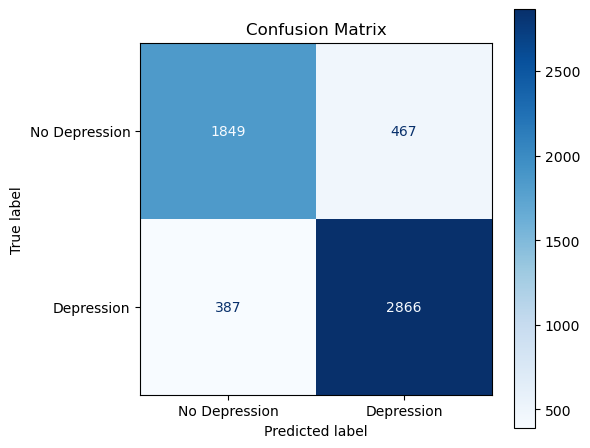

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Depression'])
disp.plot(cmap='Blues', ax=ax, values_format='d')

plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib  # for saving the best model
from sklearn.base import clone

In [5]:
# Load and preprocess data
df_BALANCE = pd.read_csv("Modeling_4-23.csv")
df_BALANCE = pd.get_dummies(df_BALANCE, columns=['Degree'], dtype=int)

X = df_BALANCE.drop(columns=['Depression'])
y = df_BALANCE['Depression']


In [15]:
# Define pipeline
pipeline_template = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('xgb', XGBClassifier(
        colsample_bytree=1.0,
        learning_rate=0.05,
        max_depth=3,
        n_estimators=300,
        scale_pos_weight=1,
        subsample=1.0,
        eval_metric='logloss',
        random_state=42
    ))
])

In [17]:

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_recall = 0
best_model = None
fold_recalls = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"Training fold {fold}...")

    X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

    # Clone a fresh pipeline for each fold
    pipeline = clone(pipeline_template)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    recall = recall_score(y_val, y_pred)
    fold_recalls.append(recall)

    print(f"Fold {fold} Recall: {recall:.4f}")

    # Save the model if it's the best so far
    if recall > best_recall:
        best_recall = recall
        best_model = pipeline

Training fold 1...
Fold 1 Recall: 0.8671
Training fold 2...
Fold 2 Recall: 0.8730
Training fold 3...
Fold 3 Recall: 0.8668
Training fold 4...
Fold 4 Recall: 0.8763
Training fold 5...
Fold 5 Recall: 0.8646


In [19]:

print("\nCross-Validation Recalls:", fold_recalls)
print("Mean Recall:", np.mean(fold_recalls))
print("Best Recall:", best_recall)

# (Optional) Save the best model
joblib.dump(best_model, "best_xgb_model.pkl")
print("Best model saved as 'best_xgb_model.pkl'")


Cross-Validation Recalls: [0.8671371586376189, 0.8729671678428966, 0.8668303160478674, 0.876304481276857, 0.8646408839779005]
Mean Recall: 0.8695760015566281
Best Recall: 0.876304481276857
Best model saved as 'best_xgb_model.pkl'
